<a href="https://www.kaggle.com/code/ishaanshh7/swiggy-analytics?scriptVersionId=256046908" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# Importing Libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import re
plt.style.use('dark_background')


#  Reading CSV

In [3]:
df = pd.read_csv('../input/swiggys-top-rated-restaurants-in-delhi/rest_delhi1.csv')
df.head()

,name,cuisine,location,rating,num_of_rating,price_for_two
0,Momo Maker,"Snacks, Tandoor","CentraL Market, Lajpat Nagar",4.7,20+ ratings,₹ 200
1,Moets Kulfi,"Desserts, Beverages","Defence colony market, Defence Colony",4.7,50+ ratings,₹ 200
2,Behrouz Biryani - Royal & Safe,"Biryani, Mughlai","Near Metro Station, Shakarpur Khas",4.7,1K+ ratings,₹ 500
3,Triveni Terrace Cafe,Indian,"Opposite FICCI Auditorium, Mandi House",4.7,50+ ratings,₹ 400
4,Momo Guy,"Chinese, Tibetan","GTB Nagar, GTB Nagar",4.6,20+ ratings,₹ 200


In [4]:
df.shape

(912, 6)

In [5]:
df.columns

Index(['name', 'cuisine', 'location', 'rating', 'num_of_rating',
       'price_for_two'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           912 non-null    object
 1   cuisine        912 non-null    object
 2   location       912 non-null    object
 3   rating         912 non-null    object
 4   num_of_rating  912 non-null    object
 5   price_for_two  912 non-null    object
dtypes: object(6)
memory usage: 42.9+ KB


# Dropping Duplicates

In [7]:
df.drop_duplicates(inplace = True)
df.shape

(764, 6)

# Data Cleaning 

## Cleaning rating column

In [8]:
df['rating'].unique()

array(['4.7', '4.6', '4.5', '4.4', '4.3', '4.2', '4.1', '4.0', '3.9',
       '3.8', '3.7', '3.6', '3.5', '3.4', '3.3', '3.2', '3.1', '3.0',
       '2.9', '2.8', '2.7', '2.3', '2.2', '--'], dtype=object)

## Removing '--' from rating column

In [9]:
def handlerating(value):
    if value == '--':
        return np.nan
    else:
        return float(value)

df['rating'] = df['rating'].apply(handlerating)


unique_ratings = df['rating'].unique()
print(unique_ratings)

[4.7 4.6 4.5 4.4 4.3 4.2 4.1 4.  3.9 3.8 3.7 3.6 3.5 3.4 3.3 3.2 3.1 3.
 2.9 2.8 2.7 2.3 2.2 nan]


In [10]:
df['rating'].median()

4.1

In [11]:
df['rating'].fillna(df['rating'].median(), inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 764 entries, 0 to 911
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           764 non-null    object 
 1   cuisine        764 non-null    object 
 2   location       764 non-null    object 
 3   rating         764 non-null    float64
 4   num_of_rating  764 non-null    object 
 5   price_for_two  764 non-null    object 
dtypes: float64(1), object(5)
memory usage: 41.8+ KB


# Renaming a column

In [13]:
df.rename(columns = {'price_for_two':'cost2plates'},inplace=True)
df.head()

,name,cuisine,location,rating,num_of_rating,cost2plates
0,Momo Maker,"Snacks, Tandoor","CentraL Market, Lajpat Nagar",4.7,20+ ratings,₹ 200
1,Moets Kulfi,"Desserts, Beverages","Defence colony market, Defence Colony",4.7,50+ ratings,₹ 200
2,Behrouz Biryani - Royal & Safe,"Biryani, Mughlai","Near Metro Station, Shakarpur Khas",4.7,1K+ ratings,₹ 500
3,Triveni Terrace Cafe,Indian,"Opposite FICCI Auditorium, Mandi House",4.7,50+ ratings,₹ 400
4,Momo Guy,"Chinese, Tibetan","GTB Nagar, GTB Nagar",4.6,20+ ratings,₹ 200


# Cleaning cost2plates column

In [14]:
df['cost2plates'].unique()

array(['₹ 200', '₹ 500', '₹ 400', '₹ 150', '₹ 350', '₹ 600', '₹ 300',
       '₹ 1500', '₹ 1400', '₹ 800', '₹ 250', '₹ 120', '₹ 100', '₹ 550',
       '₹ 450', '₹ 1200', '₹ 220', '₹ 1100', '₹ 900', '₹ 180', '₹ 1000',
       '₹ 1800', '₹ 225', '₹ 850', '₹ 700', '₹ 229', '₹ 160', '₹ 270',
       '₹ 1050', '₹ 149', '₹ 299', '₹ 499', '₹ 80', '₹ 75', '₹ 430',
       '₹ 1300', '₹ 99', '₹ 280', '₹ 240', '₹ 750', '₹ 399'], dtype=object)

In [15]:
df['cost2plates']=df['cost2plates'].str.split('₹ ').str[1]

In [16]:
df.head()

,name,cuisine,location,rating,num_of_rating,cost2plates
0,Momo Maker,"Snacks, Tandoor","CentraL Market, Lajpat Nagar",4.7,20+ ratings,200
1,Moets Kulfi,"Desserts, Beverages","Defence colony market, Defence Colony",4.7,50+ ratings,200
2,Behrouz Biryani - Royal & Safe,"Biryani, Mughlai","Near Metro Station, Shakarpur Khas",4.7,1K+ ratings,500
3,Triveni Terrace Cafe,Indian,"Opposite FICCI Auditorium, Mandi House",4.7,50+ ratings,400
4,Momo Guy,"Chinese, Tibetan","GTB Nagar, GTB Nagar",4.6,20+ ratings,200


# cleaning num_of_rating column


In [17]:
df['num_of_rating'].unique()

array(['20+ ratings', '50+ ratings', '1K+ ratings', '100+ ratings',
       '500+ ratings', 'Too Few Ratings'], dtype=object)

In [18]:
df["num_of_rating"]=df["num_of_rating"].map({'20+ ratings':20, '50+ ratings':50, '1K+ ratings':1000, '100+ ratings':100,
       '500+ ratings':500, 'Too Few Ratings':5})

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 764 entries, 0 to 911
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           764 non-null    object 
 1   cuisine        764 non-null    object 
 2   location       764 non-null    object 
 3   rating         764 non-null    float64
 4   num_of_rating  764 non-null    int64  
 5   cost2plates    764 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 41.8+ KB


In [20]:
#converting num_of_rating and cost2plates's datatype to int
df['num_of_rating']= df["num_of_rating"].astype(int)
df['cost2plates']= df["cost2plates"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 764 entries, 0 to 911
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           764 non-null    object 
 1   cuisine        764 non-null    object 
 2   location       764 non-null    object 
 3   rating         764 non-null    float64
 4   num_of_rating  764 non-null    int64  
 5   cost2plates    764 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 41.8+ KB


# Cleaning location column

In [21]:
df['location'].value_counts()

Laxmi Nagar, Laxmi Nagar                          114
Lajpat Nagar, Lajpat Nagar                         59
Connaught Place, Connaught Place                   33
GTB Nagar, GTB Nagar                               32
South Extension, South Extension                   31
                                                 ... 
Opp Rajiv Chowk Metro Station, Connaught Place      1
Connaught Circle, Connaught Place                   1
Hanuman Road Area, Connaught Place                  1
Chuna Mandi, Paharganj, Paharganj                   1
South Extension, Hauz Khas                          1
Name: location, Length: 301, dtype: int64

In [22]:
df['location'].unique()

array(['CentraL Market, Lajpat Nagar',
       'Defence colony market, Defence Colony',
       'Near Metro Station, Shakarpur Khas',
       'Opposite FICCI Auditorium, Mandi House', 'GTB Nagar, GTB Nagar',
       'Near Radhe Krishna Mandir, Gautam Nagar', 'Laxmi Nagar, Shahdara',
       'Ashok Vihar, Ashok Vihar', 'PANDAV NAGAR, Mayur Vihar',
       'Defence Colony, Kotla Mubarakpur', 'Lajpat Nagar, Defence Colony',
       'South Extension, South Extension',
       'Maharani Bagh, Defence Colony', 'Chanakyapuri, Chanakyapuri',
       'Daryaganj, Daryaganj', 'Gole Market, Gole Market',
       'PVR Plaza, Connaught Place', 'M Block CP, M Block CP',
       'L Block,outer circle, Connaught Place',
       'Connaught Place, Connaught Place',
       'Gujranwala Town, Gujranwala Town', 'Laxmi Nagar, Laxmi Nagar',
       'Lajpat Nagar, Lajpat Nagar', 'Kirti Nagar, Kirti Nagar',
       'South Campus, South Campus', 'Chankyapuri, Chanakyapuri',
       'Bagh, Karol Bagh', 'Old Delhi, Old Delhi',
  

1. Standardize casing

In [23]:
df['location'] = df['location'].str.title()

2. Remove duplicate consecutive place names

In [24]:
df['location'] = df['location'].str.replace(r'\b(\w+(?: \w+)*)\b(?:, \1)+', r'\1', regex=True)

3. Fix common misspellings

In [25]:
corrections = {
    "Cannaught Place": "Connaught Place",
    "Connought Place": "Connaught Place",
    "Chankyapuri": "Chanakyapuri",
    "Gtb Nagar": "GTB Nagar",
    "Karol Bagh, Krishna Nagar, Karol Bagh": "Karol Bagh, Krishna Nagar"
}

df['location'] = df['location'].replace(corrections, regex=False)


4. Strip extra spaces

In [26]:
df['main_location'] = df['location'].str.split(',').str[0].str.strip()


5. Remove rare typos by fuzzy matching

In [27]:
from fuzzywuzzy import process

unique_locs = df['main_location'].unique()

# Example: find close matches for "Laxmi Nagar"
process.extract("Laxmi Nagar", unique_locs, limit=5)


[('Laxmi Nagar', 100),
 ('Nagar', 90),
 ('Lajpat Nagar Market', 86),
 ('Kirti Nagar Industrial Area', 86),
 ('Ganesh Nagar 2 Extn.', 86)]

In [28]:
df['location'].unique()

array(['Central Market, Lajpat Nagar',
       'Defence Colony Market, Defence Colony',
       'Near Metro Station, Shakarpur Khas',
       'Opposite Ficci Auditorium, Mandi House', 'GTB Nagar',
       'Near Radhe Krishna Mandir, Gautam Nagar', 'Laxmi Nagar, Shahdara',
       'Ashok Vihar', 'Pandav Nagar, Mayur Vihar',
       'Defence Colony, Kotla Mubarakpur', 'Lajpat Nagar, Defence Colony',
       'South Extension', 'Maharani Bagh, Defence Colony', 'Chanakyapuri',
       'Daryaganj', 'Gole Market', 'Pvr Plaza, Connaught Place',
       'M Block Cp', 'L Block,Outer Circle, Connaught Place',
       'Connaught Place', 'Gujranwala Town', 'Laxmi Nagar',
       'Lajpat Nagar', 'Kirti Nagar', 'South Campus',
       'Chankyapuri, Chanakyapuri', 'Bagh, Karol Bagh', 'Old Delhi',
       'Chandni Chowk', 'Shivaji Stadium Metro, Connaught Place',
       'Janpath Market, Connaught Place', 'Laxmi Nagar, Krishna Nagar',
       'Hauz Khas', 'Safdarjung Enclave', 'Patel Nagar, Kirti Nagar',
       'Mayu

The data is still messy so lets build a list of known main locations.

You can pull them from your own dataset by manually curating unique names from df['location'], or from a master list:

In [29]:
known_locations = [
    "Connaught Place", "Chandni Chowk", "Karol Bagh", "Greater Kailash",
    "Defence Colony", "Lajpat Nagar", "Laxmi Nagar", "Hauz Khas",
    "GTB Nagar", "Gautam Nagar", "Mayur Vihar", "South Extension",
    "Vasant Kunj", "Dwarka", "Rohini", "Sainik Farm",
    "Jasola", "Jahangirpuri", "Nand Nagri", "Pitampura",
    "Nasirpur", "Shalimar Bagh",  # from DDA scheme :contentReference[oaicite:0]{index=0}
    "Daryaganj", "Old Delhi", "Jama Masjid", "New Delhi",
    "APNA Ghar", "New Friends Colony", "Green Park",
    "Munirka", "Janakpuri", "Shahdara", "Patel Nagar",
    "Preet Vihar", "Rajinder Nagar", "Paharganj", "Karol Bagh",
    "Anand Vihar", "Mehrauli", "Tilak Nagar", "Narela",
    "Vasant Vihar", "New Ashok Nagar", "Jangpura", "Moti Nagar",
    "Chanakyapuri", "Sarai Kale Khan", "Ashok Vihar", "RK Puram",
    "Yamuna Vihar", "Nizamuddin", "Jor Bagh", "Golf Links"
    # Plus more from the map listing :contentReference[oaicite:1]{index=1}
]


Extract the first matching location from the text

We can scan each address string for the first match from this list:

In [30]:
import re

def extract_main_loc(addr):
    for loc in known_locations:
        if re.search(rf"\b{re.escape(loc)}\b", addr, re.IGNORECASE):
            return loc
    return None

df['clean_location'] = df['location'].apply(extract_main_loc)


In [31]:
df.clean_location.unique()

array(['Lajpat Nagar', 'Defence Colony', None, 'GTB Nagar',
       'Gautam Nagar', 'Laxmi Nagar', 'Ashok Vihar', 'Mayur Vihar',
       'South Extension', 'Chanakyapuri', 'Daryaganj', 'Connaught Place',
       'Karol Bagh', 'Old Delhi', 'Chandni Chowk', 'Hauz Khas',
       'Patel Nagar', 'Rajinder Nagar', 'Greater Kailash', 'Preet Vihar',
       'Jangpura', 'Paharganj', 'Shahdara', 'Dwarka', 'Moti Nagar',
       'Janakpuri', 'Rohini'], dtype=object)

In [32]:
df['clean_location'].value_counts()

Laxmi Nagar        172
Connaught Place     79
Lajpat Nagar        78
GTB Nagar           59
South Extension     51
Mayur Vihar         32
Ashok Vihar         28
Karol Bagh          27
Defence Colony      21
Chanakyapuri        15
Paharganj           10
Rajinder Nagar       9
Hauz Khas            8
Daryaganj            7
Old Delhi            5
Preet Vihar          5
Jangpura             5
Gautam Nagar         4
Patel Nagar          4
Greater Kailash      4
Shahdara             4
Janakpuri            3
Chandni Chowk        2
Moti Nagar           1
Dwarka               1
Rohini               1
Name: clean_location, dtype: int64

In [33]:
# location = df['location'].value_counts(ascending  = False)

# location_lessthan2 = location[location<2]

# def handle_location(value):
#     if(value in location_lessthan2):
#         return 'others'
#     else:
#         return value
        
# df['location'] = df['location'].apply(handle_location)
# df['location'].value_counts()

In [34]:
# def handle_location(value):
#     words = value.split(',') or value.split('-')
#     return words[0].strip()
# df['location'] = df['location'].apply(handle_location)
# df['location'].head(10)

## Adding a new column named 'zone'

In [35]:
zoneDict = {
    # North Delhi
    'GTB Nagar': 'North',
    'Shahdara': 'North',
    'Civil Lines': 'North',
    'Model Town': 'North',
    'Rohini': 'North',
    'Kamla Nagar': 'North',

    # South Delhi
    'South Extension': 'South',
    'South Campus': 'South',
    'Safdarjung Enclave': 'South',
    'Greater Kailash 2': 'South',
    'R.K Puram': 'South',
    'Hauz Khas': 'South',
    'Saket': 'South',
    'Malviya Nagar': 'South',
    'Vasant Kunj': 'South',

    # East Delhi
    'Laxmi Nagar': 'East',
    'Lajpat Nagar': 'East',
    'Mayur Vihar': 'East',
    'Defence Colony': 'East',
    'Krishna Nagar': 'East',
    'Preet Vihar': 'East',
    'Vivek Vihar': 'East',

    # West Delhi
    'Ashok Vihar': 'West',
    'Kirti Nagar': 'West',
    'Janakpuri': 'West',
    'Rajouri Garden': 'West',
    'Paschim Vihar': 'West',
    'Dwarka': 'West',

    # Central Delhi
    'Connaught Place': 'Central',
    'Near Metro Station': 'Central',
    'Daryaganj': 'Central',
    'Gole Market': 'Central',
    'Old Delhi': 'Central',
    'Karol Bagh': 'Central',
    'Nagar': 'Central',
    'Paharganj': 'Central',

    # Others
    'others': 'others'
}

In [36]:
# Normalize to avoid case mismatches
df["zone"] = df["clean_location"].str.strip().str.title().map(zoneDict).fillna("others")

In [37]:
df.tail(4)

,name,cuisine,location,rating,num_of_rating,cost2plates,main_location,clean_location,zone
908,Sizzling Saucers,"Chinese, Fast Food",Laxmi Nagar,4.1,5,450,Laxmi Nagar,Laxmi Nagar,East
909,Jain's Pizza Shakarpur,"Pizzas, Italian",Laxmi Nagar,4.1,5,200,Laxmi Nagar,Laxmi Nagar,East
910,PIZZA DELIGHT,Italian,Lajpat Nagar,4.1,5,200,Lajpat Nagar,Lajpat Nagar,East
911,Growmor- The Cake Series,Bakery,Laxmi Nagar,4.1,5,100,Laxmi Nagar,Laxmi Nagar,East


In [38]:
# zoneDict = {'others':'others', 'GTB Nagar':'North', 'South Extension':'South', 'Connaught Place':'Central',
#        'Laxmi Nagar':'East','Near Metro Station':'Central', 'Lajpat Nagar':'East','Ashok Vihar':'West','Daryaganj':'Central',
#        'Gole Market':'Central', 'Kirti Nagar':'West', 'South Campus':'South',
#        'Old Delhi':'Central', 'Safdarjung Enclave':'South', 'Mayur Vihar':'East', 'Defence Colony':'East',
#        'Greater Kailash 2':'South', 'Karol Bagh':'Central', 'Nagar':'Central', 'Shahdara':'North',
#        'Krishna Nagar':'East', 'R.K Puram':'South', 'Janakpuri':'West' }
# df["zone"] = df["location"].map(zoneDict)
# df.head(10)

In [39]:
df['cost2plates'].unique()

array([ 200,  500,  400,  150,  350,  600,  300, 1500, 1400,  800,  250,
        120,  100,  550,  450, 1200,  220, 1100,  900,  180, 1000, 1800,
        225,  850,  700,  229,  160,  270, 1050,  149,  299,  499,   80,
         75,  430, 1300,   99,  280,  240,  750,  399])

In [40]:
max_price = df['cost2plates'].max()
max_price

1800

In [41]:
min_price = df['cost2plates'].min()
min_price

75

In [42]:
price_range= max_price - min_price
interval_size = price_range / 3
part1 = min_price
part2 = min_price + interval_size
part3 = min_price + (2 * interval_size)
print(part1, part2, part3)

75 650.0 1225.0


## Adding a new column 'price_range' 

In [43]:
# Define price ranges
df.loc[df["cost2plates"] <= 75, "price_range"] = "₹"
df.loc[(df["cost2plates"] > 75) & (df["cost2plates"] <= 650), "price_range"] = "₹₹"
df.loc[(df["cost2plates"] > 650) & (df["cost2plates"] < 1225), "price_range"] = "₹₹₹"
df.loc[df["cost2plates"] >= 1225, "price_range"] = "₹₹₹₹"

df.head(2)

,name,cuisine,location,rating,num_of_rating,cost2plates,main_location,clean_location,zone,price_range
0,Momo Maker,"Snacks, Tandoor","Central Market, Lajpat Nagar",4.7,20,200,Central Market,Lajpat Nagar,East,₹₹
1,Moets Kulfi,"Desserts, Beverages","Defence Colony Market, Defence Colony",4.7,50,200,Defence Colony Market,Defence Colony,East,₹₹


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 764 entries, 0 to 911
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            764 non-null    object 
 1   cuisine         764 non-null    object 
 2   location        764 non-null    object 
 3   rating          764 non-null    float64
 4   num_of_rating   764 non-null    int64  
 5   cost2plates     764 non-null    int64  
 6   main_location   764 non-null    object 
 7   clean_location  635 non-null    object 
 8   zone            764 non-null    object 
 9   price_range     764 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 65.7+ KB


## Cleaning Cuisine column

In [45]:
df['cuisine'].unique()

array(['Snacks, Tandoor', 'Desserts, Beverages', 'Biryani, Mughlai',
       'Indian', 'Chinese, Tibetan', 'Beverages', 'Beverages, Snacks',
       'Snacks, Beverages', 'Closes soonSouth Indian', 'Bakery, Desserts',
       'Mughlai, North Indian', 'American, Beverages', 'Desserts, Bakery',
       'Indian, Coastal', 'Salads', 'Italian',
       'Ice Cream, Ice Cream Cakes', 'Ice Cream', 'Desserts, Ice Cream',
       'North Indian, Chinese', 'North Indian, Indian',
       'North Indian, Healthy Food', 'Indian, Thalis', 'Desserts',
       'Chinese, Fast Food', 'North Indian, Snacks',
       'Ice Cream, Desserts', 'Opens next at 4:10 pm, todayNorth Indian',
       'Snacks', 'Beverages, Pizzas', 'Bakery', 'South Indian',
       'Indian, North Indian', 'Naga, Chinese', 'Fast Food, Salads',
       'North Indian, Grill', 'Bihari, Desserts', 'North Indian',
       'Chinese, Thai', 'Asian, Japanese', 'Desserts, Fast Food',
       'Beverages, Desserts', 'Chinese, Asian', 'Fast Food',
       'South 

In [46]:
# Define a function to clean cuisine values
def clean_cuisine(cuisine):
    # Identify and remove redundant time-related phrases
    time_phrases = ["Closes soon", "Opens next at", "today", "tomorrow", "am", "pm"]
    for phrase in time_phrases:
        if phrase in cuisine:
            # Split by time-related information and keep the part before it
            parts = cuisine.split(phrase)
            cuisine = parts[-1].strip() if len(parts) > 1 else parts[0].strip()
    return cuisine

# Apply the function to the 'cuisine' column
df['cuisine'] = df['cuisine'].apply(clean_cuisine)

# Check the cleaned unique values
unique_cuisines = df['cuisine'].unique()
print(unique_cuisines)

['Snacks, Tandoor' 'Desserts, Beverages' 'Biryani, Mughlai' 'Indian'
 'Chinese, Tibetan' 'Beverages' 'Beverages, Snacks' 'Snacks, Beverages'
 'South Indian' 'Bakery, Desserts' 'Mughlai, North Indian'
 'American, Beverages' 'Desserts, Bakery' 'Indian, Coastal' 'Salads'
 'Italian' 'Cakes' '' 'North Indian, Chinese' 'North Indian, Indian'
 'North Indian, Healthy Food' 'Indian, Thalis' 'Desserts'
 'Chinese, Fast Food' 'North Indian, Snacks' ', Desserts' 'North Indian'
 'Snacks' 'Beverages, Pizzas' 'Bakery' 'Indian, North Indian'
 'Naga, Chinese' 'Fast Food, Salads' 'North Indian, Grill'
 'Bihari, Desserts' 'Chinese, Thai' 'Asian, Japanese'
 'Desserts, Fast Food' 'Beverages, Desserts' 'Chinese, Asian' 'Fast Food'
 'South Indian, North Indian' 'Chinese' 'Andhra, South Indian' 'American'
 'Rajasthani, Thalis' 'American, Mexican' 'Beverages, Fast Food'
 'American, Fast Food' 'Chinese, Japanese' 'Waffle, Desserts'
 'Indian, Beverages' 'Desserts, Sweets' 'Biryani' 'Biryani, Fast Food'
 'Pastas, 

In [47]:
df['cuisine'] = df['cuisine'].str.strip().str.lower()

In [48]:
df = df.assign(cuisine=df['cuisine'].str.split(',')).explode('cuisine')
df['cuisine'] = df['cuisine'].str.strip()

In [49]:
replace_map = {
    'north indian': 'indian',
    'south indian': 'indian',
    'mughlai': 'indian',
    'pan-asian': 'asian',
    'pastas': 'pasta',
    'desserts': 'dessert',
    'beverages': 'beverage',
    # add more mappings as needed
}
df['cuisine'] = df['cuisine'].replace(replace_map)


In [50]:
df = df.drop_duplicates()
df = df[df['cuisine'] != '']

# Data Visualization

 # Number of Restaurants per location and Zone

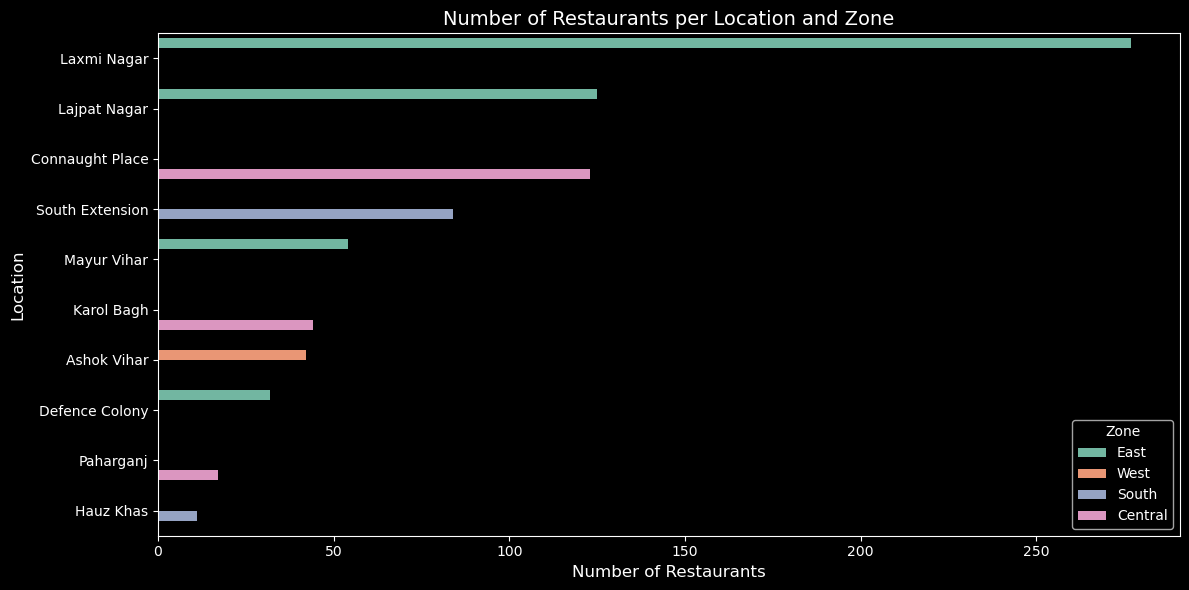

In [51]:
# Calculate the count of restaurants per location, excluding 'others'

df_filtered = df[df['zone'] != 'others']

# Count restaurants per clean_location
location_counts = df_filtered['clean_location'].value_counts()

# Get top 10 locations
top_10_locations = location_counts.nlargest(10).index

# Filter for top 10 locations
top_10_df = df_filtered[df_filtered['clean_location'].isin(top_10_locations)]

# Plot with zone as hue
plt.figure(figsize=(12, 6))
sns.countplot(
    data=top_10_df,
    y="clean_location",
    order=top_10_locations,
    hue="zone",
    palette="Set2"
)

plt.title('Number of Restaurants per Location and Zone', fontsize=14)
plt.xlabel('Number of Restaurants', fontsize=12)
plt.ylabel('Location', fontsize=12)
plt.legend(title="Zone")
plt.tight_layout()
plt.show()

 ## Number of Restaurants per zone

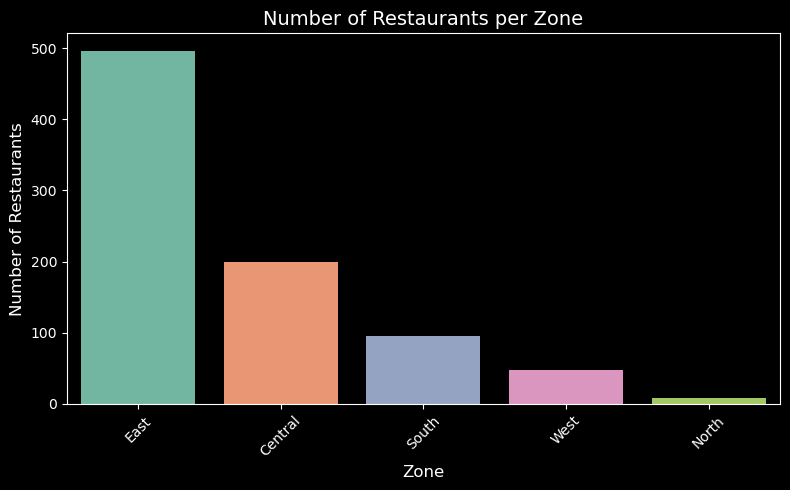

In [52]:
filtered_df = df[df['zone'] != 'others']

plt.figure(figsize=(8, 5))
sns.countplot(
    data=filtered_df,
    x="zone",
    order=filtered_df['zone'].value_counts().index,  # Sort by count
    palette="Set2"
)
plt.title('Number of Restaurants per Zone', fontsize=14)
plt.xlabel('Zone', fontsize=12)
plt.ylabel('Number of Restaurants', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Box plot for price per zone 

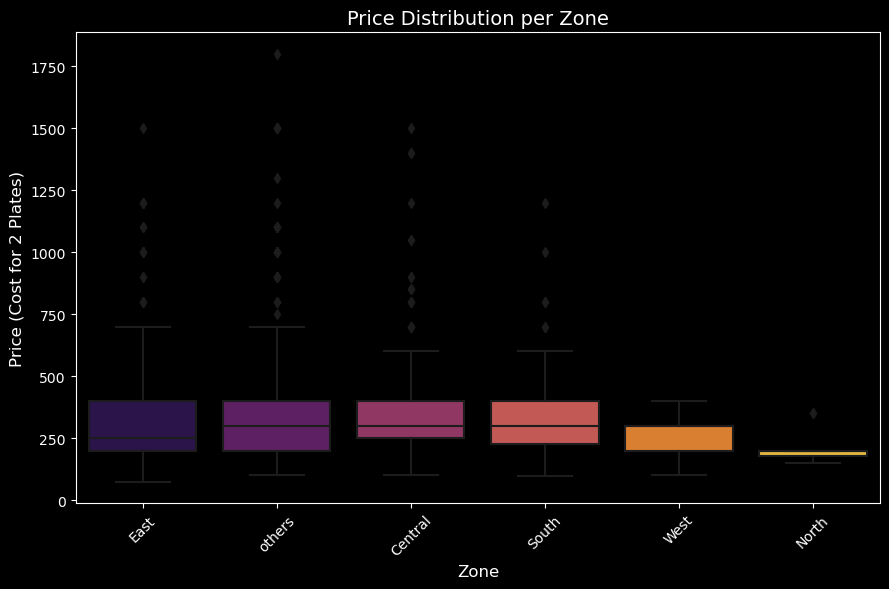

In [53]:
plt.figure(figsize=(9, 6))
sns.boxplot(
    x='zone',
    y='cost2plates',
    data=df,
    palette='inferno',
    order=df['zone'].value_counts().index  
)
plt.xlabel('Zone', fontsize=12)
plt.ylabel('Price (Cost for 2 Plates)', fontsize=12)
plt.xticks(rotation=45)
plt.title('Price Distribution per Zone', fontsize=14)
plt.tight_layout()
plt.show()


## Box plot for price per location 

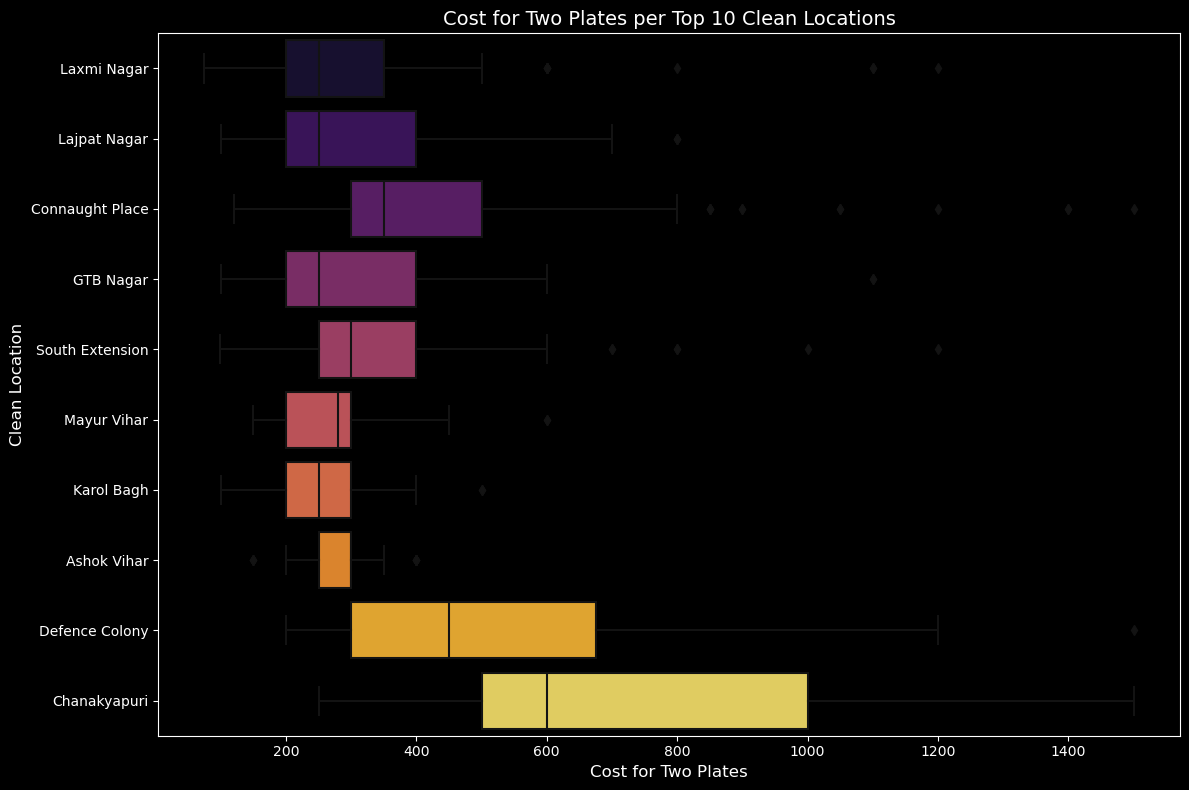

In [54]:
filtered_df = df[df['clean_location'] != 'others']

# Calculate the count of restaurants per clean_location
location_counts = filtered_df['clean_location'].value_counts()

# Identify the top 10 locations
top_10_locations = location_counts.nlargest(10).index

# Filter the DataFrame to include only the top 10 locations
top_10_df = filtered_df[filtered_df['clean_location'].isin(top_10_locations)]

# Plot the boxplot with ordered locations
plt.figure(figsize=(12, 8))
sns.boxplot(
    y='clean_location',
    x='cost2plates',
    data=top_10_df,
    palette='inferno',
    order=top_10_locations
)
plt.xlabel('Cost for Two Plates', fontsize=12)
plt.ylabel('Clean Location', fontsize=12)
plt.title('Cost for Two Plates per Top 10 Clean Locations', fontsize=14)
plt.tight_layout()
plt.show()


## Plot for location wise ratings

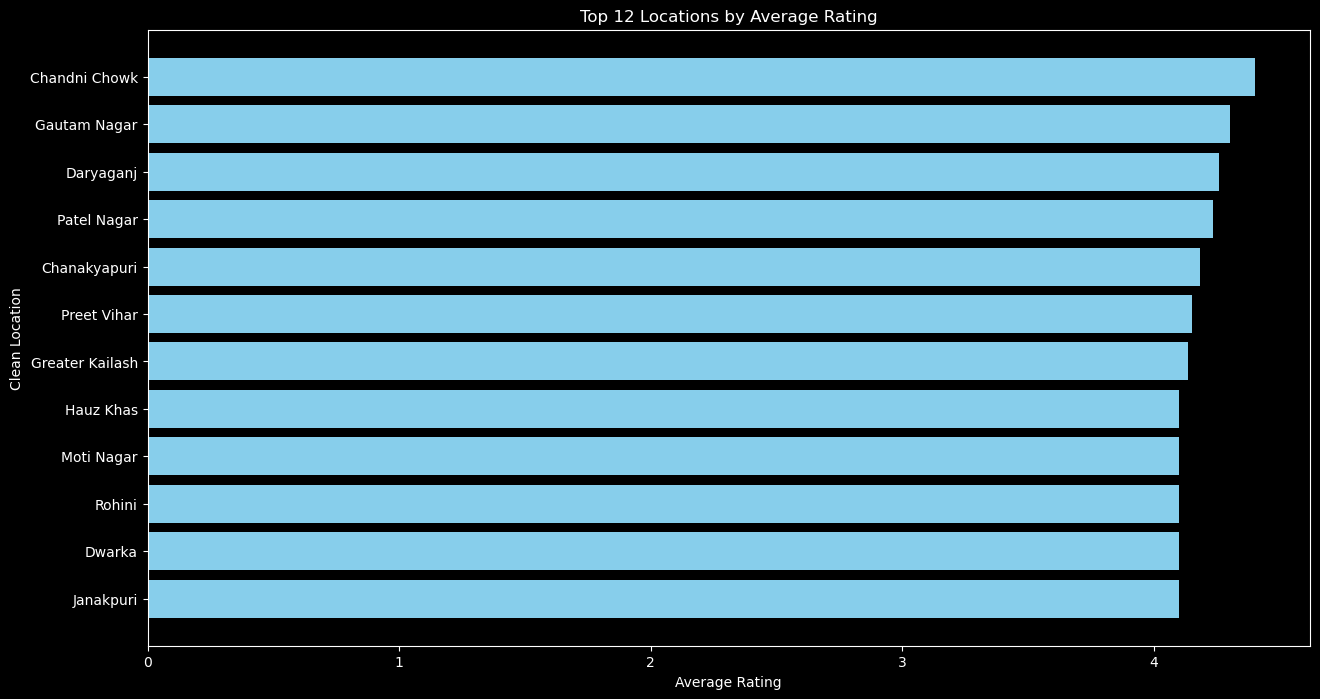

In [55]:
# Step 1: Prepare data
df4 = df[['clean_location', 'rating']].drop_duplicates()

# Step 2: Group by location and calculate average rating
df5 = df4.groupby('clean_location')['rating'].mean().reset_index()

# Step 3: Remove 'others' and missing locations
df5 = df5[df5['clean_location'].notna()]
df5 = df5[df5['clean_location'] != 'others']

# Step 4: Sort by rating
df5 = df5.sort_values(by='rating', ascending=False)

# Step 5: Select top 12 locations
top_12_df = df5.head(12)

# Step 6: Plotting
plt.figure(figsize=(15, 8))
plt.barh(top_12_df['clean_location'], top_12_df['rating'], color='skyblue')
plt.xlabel('Average Rating')
plt.ylabel('Clean Location')
plt.title('Top 12 Locations by Average Rating')
plt.gca().invert_yaxis()  # Highest rating at the top
plt.show()


## Plot for zone wise ratings

In [56]:
df1 = df[['zone', 'rating']]
df1.drop_duplicates()
df2 = df1.groupby(['zone'])['rating'].count()
df2 = df2.to_frame()
df2 = df2.sort_values('rating', ascending=False)
df2.head()

,rating
zone,
East,496
others,373
Central,200
South,95
West,47


/tmp/ipykernel_20/1815132422.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop_duplicates(inplace=True)  # Drop duplicates based on both columns


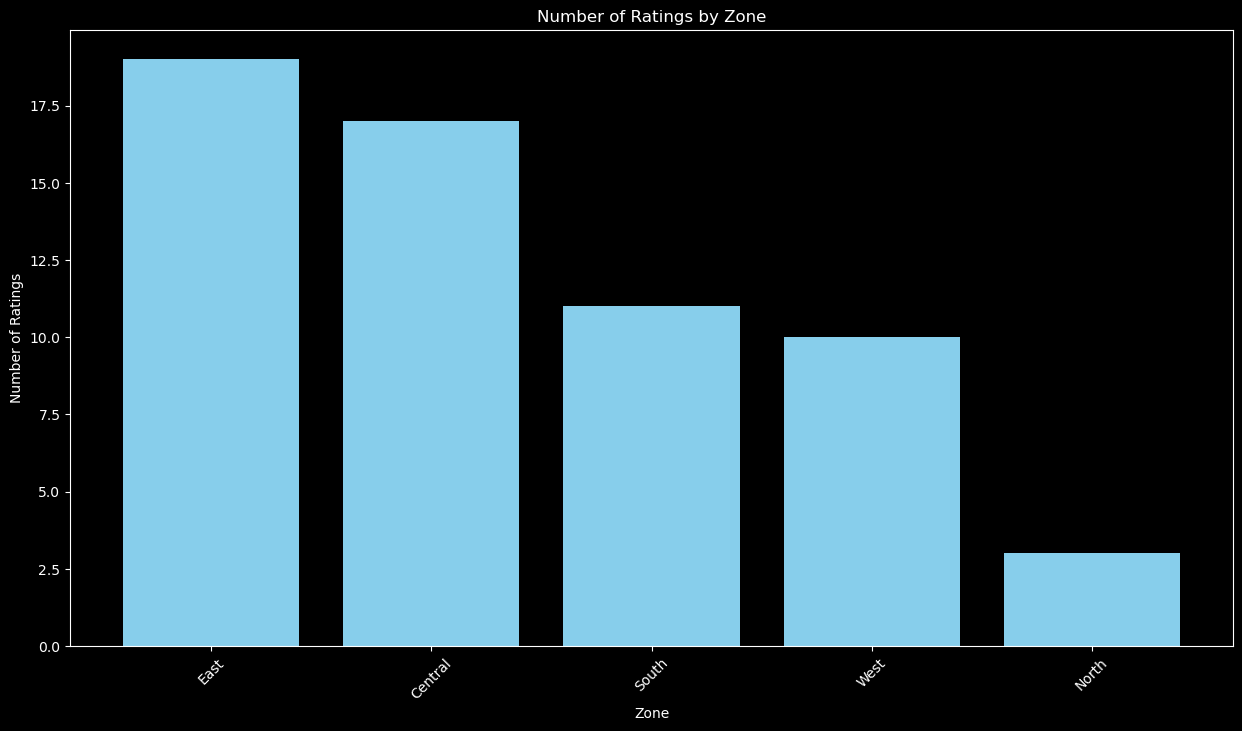

In [57]:
df1 = df[['zone', 'rating']]
df1.drop_duplicates(inplace=True)  # Drop duplicates based on both columns

df2 = df1.groupby('zone')['rating'].count().reset_index()  # Count ratings per zone

df2 = df2.sort_values(by='rating', ascending=False)
df2 = df2[df2['zone'] != 'others']  # Exclude 'others' if present

plt.figure(figsize=(15, 8))
plt.bar(df2['zone'], df2['rating'], color='skyblue')
plt.xlabel('Zone')
plt.ylabel('Number of Ratings')
plt.title('Number of Ratings by Zone')
plt.xticks(rotation=45)
plt.show()

## Visualizing number of ratings on the basis of zone

/tmp/ipykernel_20/3548582024.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7.drop_duplicates(inplace=True)  # Drop duplicates based on both columns


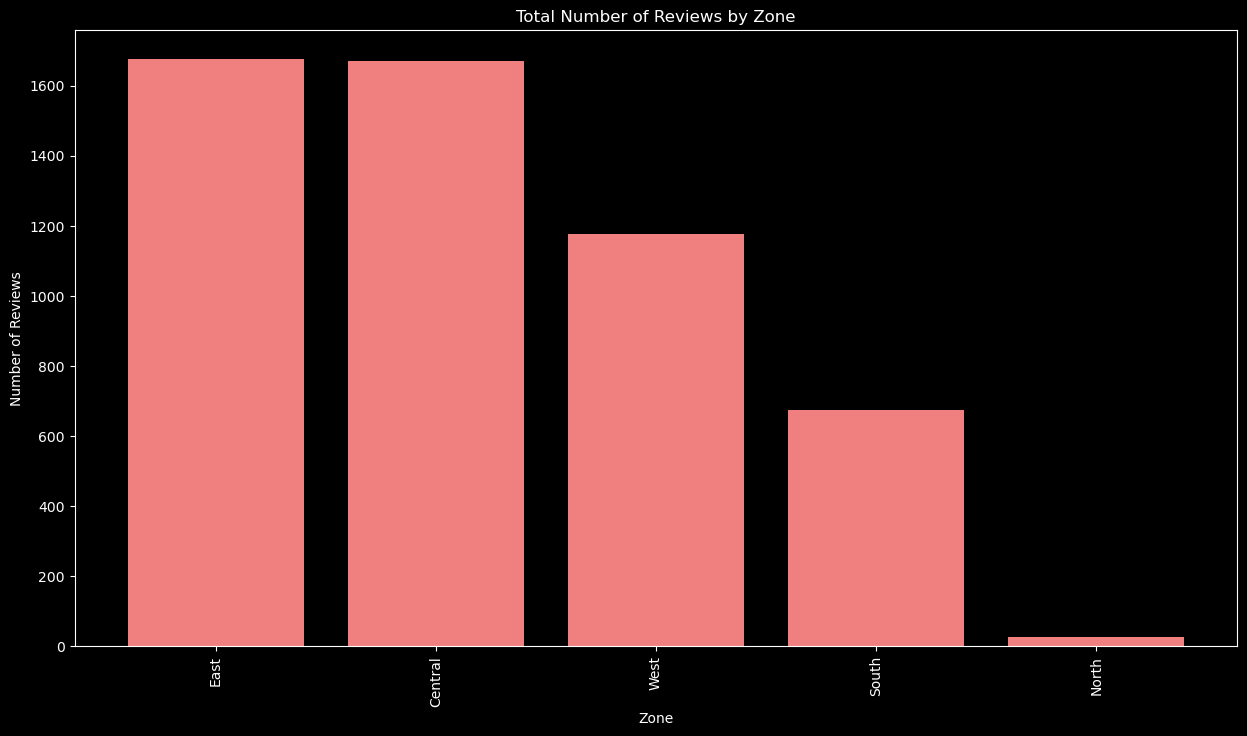

In [58]:
import matplotlib.pyplot as plt

# Step 1: Prepare data
df7 = df[['zone', 'num_of_rating']]
df7.drop_duplicates(inplace=True)  # Drop duplicates based on both columns

# Filter out 'others'
df7 = df7[df7['zone'] != 'others']

# Step 2: Grouping and aggregation
df8 = df7.groupby('zone')['num_of_rating'].sum().reset_index()  # Sum of num_of_rating per zone

# Step 3: Sorting
df8 = df8.sort_values(by='num_of_rating', ascending=False)

# Step 4: Plotting
plt.figure(figsize=(15, 8))
plt.bar(df8['zone'], df8['num_of_rating'], color='lightcoral')
plt.xlabel('Zone')
plt.ylabel('Number of Reviews')
plt.title('Total Number of Reviews by Zone')
plt.xticks(rotation=90)
plt.show()


## Visualizing top restaurants based on Ratings

/tmp/ipykernel_20/2351455919.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df9.drop_duplicates(inplace=True)


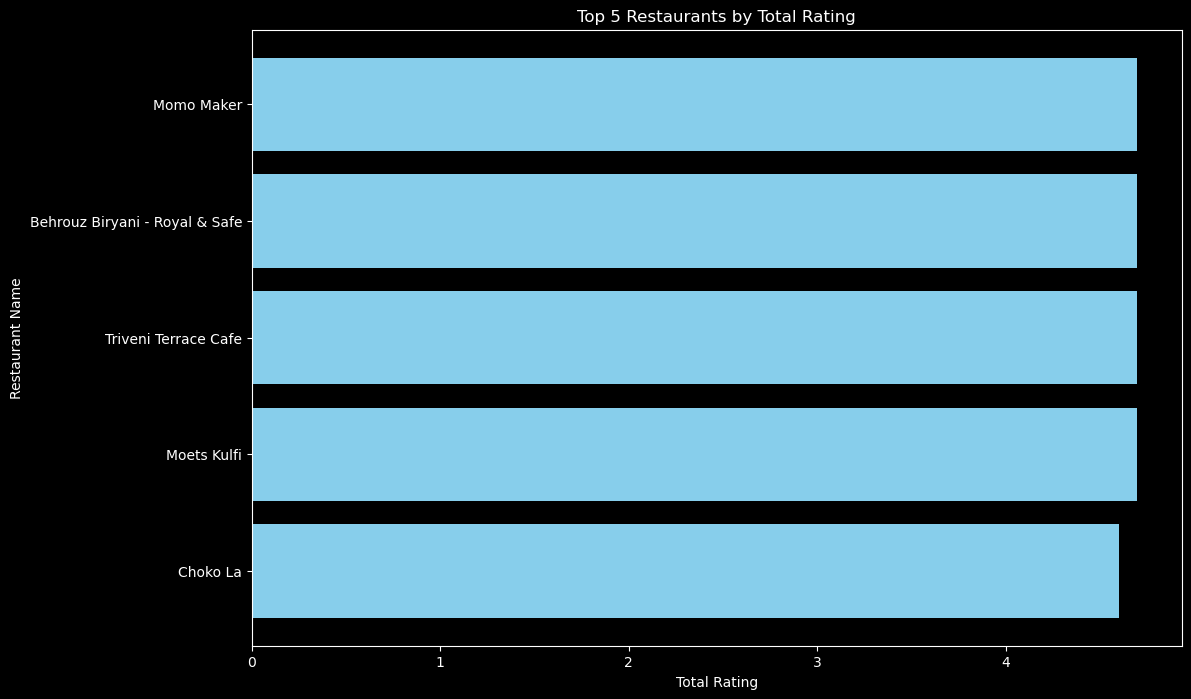

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Selecting relevant columns
df9 = df[['name', 'rating']]

# Step 2: Dropping duplicates based on 'name'
df9.drop_duplicates(inplace=True)

# Step 3: Grouping by 'name' and summing ratings
df10 = df9.groupby('name')['rating'].sum().reset_index()

# Step 4: Sorting by 'rating' in descending order
df10 = df10.sort_values(by='rating', ascending=False)

# Step 5: Selecting top 5 restaurants based on ratings
top_5_restaurants = df10.head(5)

# Step 6: Plotting
plt.figure(figsize=(12, 8))
plt.barh(top_5_restaurants['name'], top_5_restaurants['rating'], color='skyblue')
plt.ylabel('Restaurant Name')
plt.xlabel('Total Rating')
plt.title('Top 5 Restaurants by Total Rating')
plt.gca().invert_yaxis()
plt.show()
